In [1]:
# Loading all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Loading the dataset of user 7
User7 = pd.read_csv('User7_BEHACOM.csv', encoding='latin1')

In [3]:
# Dropping the unnecessary columns
B = User7.drop(columns=['current_app', 'penultimate_app','USER', 'timestamp'])

In [4]:
# Defining training set
B_train = B

# Random scalar resulting from the challenge
x = 50 

# Defining the testing data        
B_test = B * x

In [5]:
# Scaling the sets
scaler = MinMaxScaler()

# The training data is fitted and transformed
B_train_scaled = scaler.fit_transform(B_train)

# The testing data is transformed
B_test_scaled = scaler.transform(B_test)

print(B_test_scaled)
print(B_train_scaled)

[[0.         0.         0.         ... 0.08880995 0.03321837 0.92000401]
 [0.         0.         0.         ... 3.06394316 0.16524612 7.61720411]
 [0.         0.         0.         ... 0.04440497 0.14769676 3.63245058]
 ...
 [0.         0.         0.         ... 0.         0.02000525 0.03808715]
 [0.         0.         0.         ... 1.19893428 0.01858813 0.03558749]
 [0.         0.         0.         ... 0.02220249 0.02729899 0.05034267]]
[[0.         0.         0.         ... 0.0017762  0.00063761 0.01814283]
 [0.         0.         0.         ... 0.06127886 0.00327816 0.15208683]
 [0.         0.         0.         ... 0.0008881  0.00292718 0.07239176]
 ...
 [0.         0.         0.         ... 0.         0.00037334 0.0005045 ]
 [0.         0.         0.         ... 0.02397869 0.000345   0.0004545 ]
 [0.         0.         0.         ... 0.00044405 0.00051922 0.00074961]]


In [6]:
# Constructing the One Class SVM model
model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)

In [7]:
# Fitting the model with the training data
model.fit(B_train_scaled)

In [ ]:
# Deriving the decision function values
decisionf = model.decision_function(B_train_scaled)

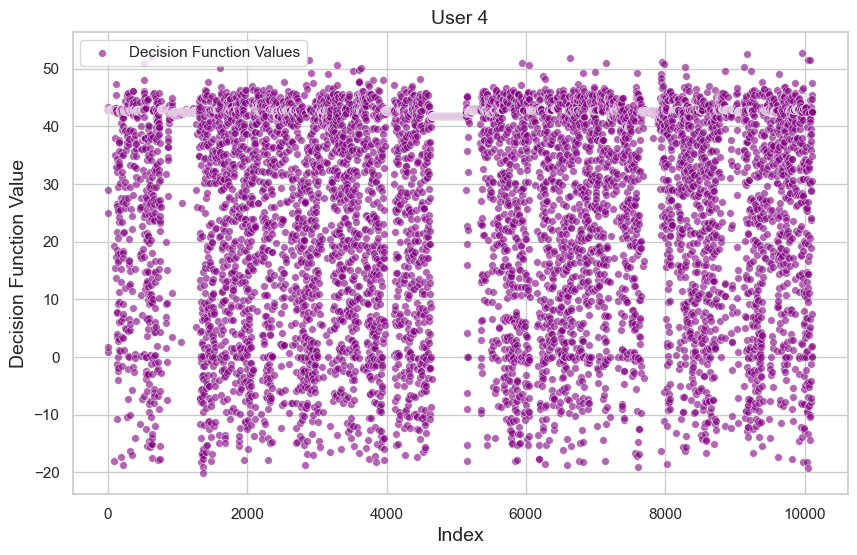

In [ ]:
sns.set(style='whitegrid', palette='muted')                     

plt.figure(figsize=(10, 6))

# Plotting the decision function output data
sns.scatterplot(x=range(len(decisionf)),
                y=decisionf, 
                color='purple', 
                marker='o', 
                s=30, 
                label='Decision Function Values', 
                alpha=0.6)

# Customising the plots
plt.title('User 4', fontsize=14)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Decision Function Value', fontsize=14)

plt.grid(True)
plt.legend()

plt.show()